<a href="https://colab.research.google.com/github/Muhammed-AhmedGithup/Sonar-Classification/blob/main/Sonar_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import seaborn as sns

In [5]:
df=pd.read_csv('/content/sample_data/sonar_dataset.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [6]:
df.shape

(208, 61)

In [7]:
df.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
56,0
57,0
58,0
59,0


In [9]:
df[60].value_counts()

,count
60,
M,111
R,97


In [10]:
df.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60],
      dtype='int64')

In [11]:
y=df[60]
x=df.drop(60,axis=1)

In [14]:
y=pd.get_dummies(y)
y.sample(5)

,R
170,False
115,False
5,True
181,False
204,False


In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
model=Sequential([
    Dense(60,activation='relu',input_shape=(60,)),
    keras.layers.Dropout(0.5),
    Dense(30,activation='relu'),
    keras.layers.Dropout(0.5),
    Dense(15,activation='relu'),
    Dense(1,activation='sigmoid',)
])

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [35]:
model.fit(x_train,y_train,epochs=300,batch_size=8)

Epoch 1/300
21/21 [==============================] - 0s 2ms/step - loss: 0.0701 - accuracy: 0.9578
Epoch 2/300
21/21 [==============================] - 0s 2ms/step - loss: 0.0602 - accuracy: 0.9699
Epoch 3/300
21/21 [==============================] - 0s 2ms/step - loss: 0.0931 - accuracy: 0.9458
Epoch 4/300
21/21 [==============================] - 0s 2ms/step - loss: 0.1155 - accuracy: 0.9458
Epoch 5/300
21/21 [==============================] - 0s 2ms/step - loss: 0.0723 - accuracy: 0.9759
Epoch 6/300
21/21 [==============================] - 0s 2ms/step - loss: 0.0711 - accuracy: 0.9578
Epoch 7/300
21/21 [==============================] - 0s 2ms/step - loss: 0.0492 - accuracy: 0.9759
Epoch 8/300
21/21 [==============================] - 0s 2ms/step - loss: 0.0374 - accuracy: 0.9819
Epoch 9/300
21/21 [==============================] - 0s 4ms/step - loss: 0.0674 - accuracy: 0.9699
Epoch 10/300
21/21 [==============================] - 0s 3ms/step - loss: 0.0386 - accuracy: 0.9819
Epoch 11/

In [36]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.6677 - accuracy: 0.8810


[0.6676551699638367, 0.8809523582458496]

In [37]:
yhat=np.round(model.predict(x_test))
yhat[0:5]

2/2 [==============================] - 0s 3ms/step


array([[0.],
       [1.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [38]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

       False       0.89      0.92      0.91        26
        True       0.87      0.81      0.84        16

    accuracy                           0.88        42
   macro avg       0.88      0.87      0.87        42
weighted avg       0.88      0.88      0.88        42



<Axes: >

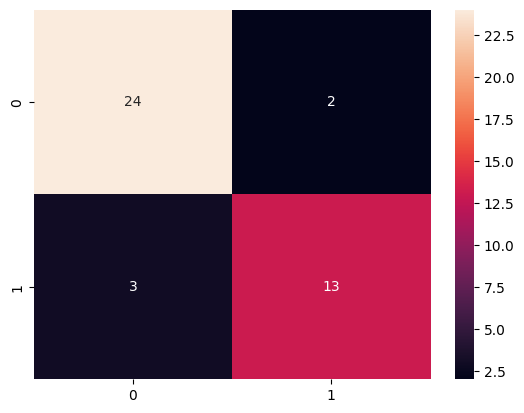

In [39]:
cm=confusion_matrix(y_test,yhat)
sns.heatmap(cm,annot=True)